### What is Statistics?

Statistics is a set of mathematical methods and tools that enable us to answer important questions about data. 

**It is divided into two categories:**

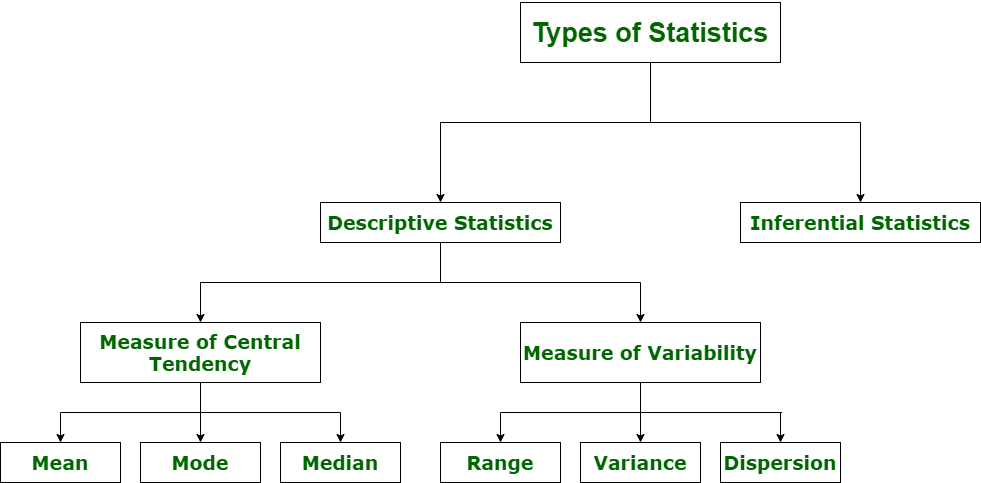

##### Why Statistics for Machine Leraning?
- From exploratory data analysis to designing hypothesis testing experiments, statistics play an integral role in solving problems across all major industries and domains.

- Statistics helps answer questions like...
    - What features are the most important?
    - How should we design the experiment to develop our product strategy?
    - What performance metrics should we measure?
    - What is the most common and expected outcome?
    - How do we differentiate between noise and valid data?

### 1. Descriptive Statistic

**Descriptive Statistics** - offers methods to summarise data by transforming raw observations into meaningful information that is easy to interpret and share in the form of numbers graph, bar plots, histogram, pie chart, etc. 

- Descriptive statistics is simply a process to describe our existing data.


##### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem Statement:

Using a dataset containing performance grades, age, exercise performance metrics, and biometric data, the objective is to conduct comprehensive statistical analysis to discern patterns, trends, and relationships within the dataset. The dataset comprises 13,393 records with 12 features including age, gender, height, weight, body fat percentage, diastolic and systolic blood pressure, grip force, sit and bend forward measurement, sit-ups counts, broad jump distance, and class designation (A, B, C, D).

#### 2) Data Collection.
- The Dataset is collected from https://www.kaggle.com/datasets/kukuroo3/body-performance-data
- The data consists of 12 column and 13393 rows.

**Import Data and Required Packages**

In [1]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
df.shape

(13393, 12)

In [4]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

**Summary of the dataset**

- The described method will help to see how data has been spread for numerical values.
- We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [5]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [7]:
df.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

##### Exploring Data

In [8]:
# Seperating numerical & categorical columns

numeric_data = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_data = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_data), numeric_data))
print('\nWe have {} categorical features : {}'.format(len(categorical_data), categorical_data))

We have 10 numerical features : ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

We have 2 categorical features : ['gender', 'class']


##### 1.1 Measure of Central Tendancy
**1.1.1 Mean**

- The “Mean” is the average of the data. 
- It is calculated by summing all the values and dividing by the total number of values.
- Mean = X1 + X2 + X3 +… + Xn / n

**Example:**

- Data – 10,20,30,40,50  and Number of observations = 5
- Mean = [ 10+20+30+40+50 ] / 5
- Mean = 30

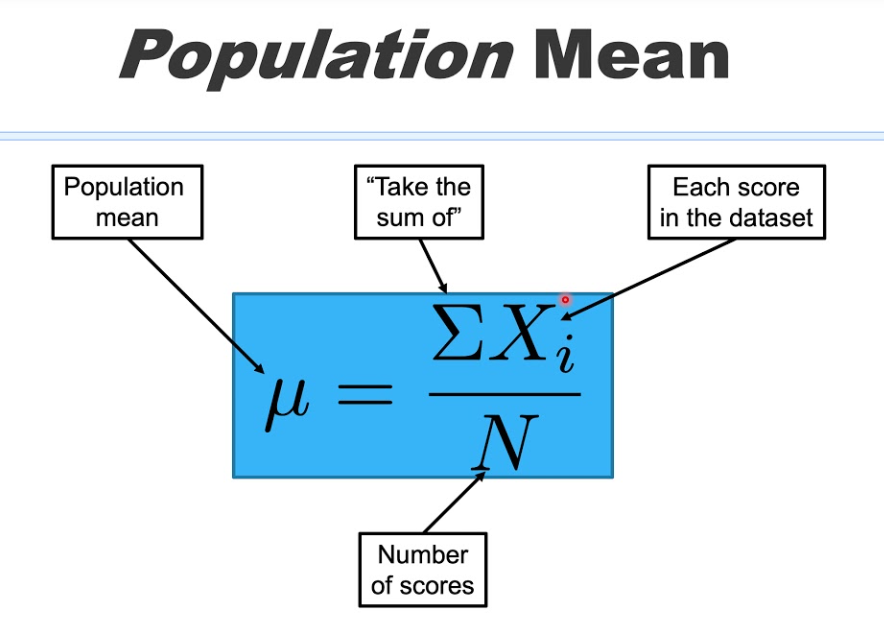

In [9]:
# Mean of all the columns in dataframe
df.mean()

age                         36.775106
height_cm                  168.559807
weight_kg                   67.447316
body fat_%                  23.240165
diastolic                   78.796842
systolic                   130.234817
gripForce                   36.963877
sit and bend forward_cm     15.209268
sit-ups counts              39.771224
broad jump_cm              190.129627
dtype: float64

In [10]:
# Mean of individual column of dataframe
df['body fat_%'].mean()

23.240164950869858

##### 1.1.2 Geometric Mean
- The Geometric Mean (GM) is the average value or mean which signifies the central tendency of the set of numbers by finding the product of their values.
- Basically, we multiply the 'n' values all-together and take out the nth root of the numbers, where n is the total number of values.

**For example:**

- For a given set of two numbers such as 8 and 1, the geometric mean is equal to √(8×1) = √8 = 2√2.

- Thus, the geometric mean is also defined as the nth root of the product of n numbers.

- In mathematics and statistics, measures of central tendencies describe the summary of whole data set values.

In [11]:
from scipy.stats import gmean
gmean(df['body fat_%'])

22.053450257160534

##### 1.1.3 Harmonic mean

- The harmonic mean is a type of average used to find the reciprocal of the arithmetic mean of reciprocals of a set of values. It is particularly useful when dealing with rates, ratios, and averages of rates.
- Harmonic mean gives less weightage to the large values and large weightage to the small values to balance the values correctly
- In general, the harmonic mean is used when there is a necessity to give greater weight to the smaller items.
- It is applied in the case of times and average rates.



In [12]:
statistics.harmonic_mean(df['body fat_%'])

20.766092233445065

##### 1.1.4 Mode
- Mode is frequently occurring data or elements.
- If an element occurs the highest number of times, it is the mode of that data.
- If no number in the data is repeated, then there is no mode for that data.
- There can be more than one mode in a dataset if two values have the same frequency and also the highest frequency.


In [13]:
df.mode()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,21.0,M,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0,C
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D


### 1.1.5 median
- Median is the 50%th percentile of the data. It is exactly the center point of the data.
- The median is a measure of central tendency that represents the middle value of a dataset when it is sorted in ascending or descending order. It's a robust statistic, meaning it is less affected by outliers compared to the mean.

**To calculate the median:**

- Arrange the dataset in ascending or descending order.
- If the dataset has an odd number of observations, the median is the middle value.
- If the dataset has an even number of observations, the median is the average of the two middle values.

In [14]:
statistics.median(df['body fat_%'])

22.8

##### Difference between Mean,Median,Mode

Mean, median, and mode are all measures of central tendency, but they each describe different aspects of a dataset. 

**Here's a brief explanation of each and how they differ:**

**Mean:**

- The mean is the average of a dataset and is calculated by summing all values in the dataset and then dividing by the total number of values.
- It is sensitive to outliers, meaning that extreme values can heavily influence the mean.
- It's often used when the data is normally distributed or approximately symmetric.

**Median:**

- The median is the middle value of a dataset when it is sorted in ascending or descending order.
- It is not influenced by extreme values (outliers) in the dataset, making it a more robust measure of central tendency than the mean.
- It's suitable for skewed distributions or when the presence of outliers is a concern.

**Mode:**

- The mode is the value that appears most frequently in a dataset.
- A dataset may have one mode (unimodal), multiple modes (multimodal), or no mode if all values occur with the same frequency.
- It is useful for categorical or nominal data and can also be used with ordinal or discrete data.

##### 1.2 Measure of Variability/Dispersion

Measures of variability, also known as measures of dispersion, quantify the extent to which data points in a dataset deviate from the central tendency. They provide insights into the spread, diversity, or dispersion of the data points. Here are some common measures of variability:

**Range:**

- The range is the simplest measure of variability and is calculated as the difference between the maximum and minimum values in a dataset.
- It provides a quick assessment of the spread of the data but is sensitive to outliers.

**Variance:**

- The variance measures the average squared deviation of each data point from the mean.
- It is calculated by summing the squared differences between each data point and the mean, then dividing by the total number of data points.
- Variance gives more weight to larger deviations and is sensitive to outliers.

**Standard Deviation:**

- The standard deviation is the square root of the variance.
- It provides a measure of the average deviation of data points from the mean.
- Standard deviation is widely used because it is in the same units as the original data and is more interpretable than variance.

**Mean Absolute Deviation (MAD):**

- The mean absolute deviation is the average of the absolute differences between each data point and the mean.
- It measures the average distance of data points from the mean.
- MAD is less sensitive to outliers compared to variance and standard deviation.

**Interquartile Range (IQR):**

- The interquartile range is the range of values between the first quartile (25th percentile) and the third quartile (75th percentile) of the dataset.
- It measures the spread of the middle 50% of the data and is less affected by outliers than the range.

##### 1.2.3 Shape of Data

**i) Symmetric**

- In the symmetric shape of the graph, the data is distributed the same on both sides.
- The mean, median, and mode are approximately equal in a symmetric distribution.
- In symmetric data, the mean and median are located close together.
- The curve formed by this symmetric graph is called a normal curve.
- **Examples** of symmetric distributions include the normal (Gaussian) distribution and the uniform distribution.

**ii) Skewness:**

- Skewness measures the asymmetry of the distribution of data.
- The data is not symmetrical (i.e) it is skewed towards one side.
- A distribution is positively skewed if the tail on the right side is longer or fatter than the left side. In other words, the bulk of the data is concentrated on the left side.
- A distribution is negatively skewed if the tail on the left side is longer or fatter than the right side. In this case, the bulk of the data is concentrated on the right side.
- Skewness can be quantified numerically. A skewness value of 0 indicates a symmetric distribution. Positive skewness values indicate right-skewed distributions, while negative skewness values indicate left-skewed distributions.

**Skewness is classified into two types.**

1. Positive Skew
2. Negative Skew

**1. Positively skewed:**

- In a Positively skewed distribution, the data values are clustered around the left side of the distribution and the right side is longer.
- The mean and median will be greater than the mode in the positive skew.

**2. Negatively skewed**

- In a Negatively skewed distribution, the data values are clustered around the right side of the distribution and the left side is longer.
- The mean and median will be less than the mode.

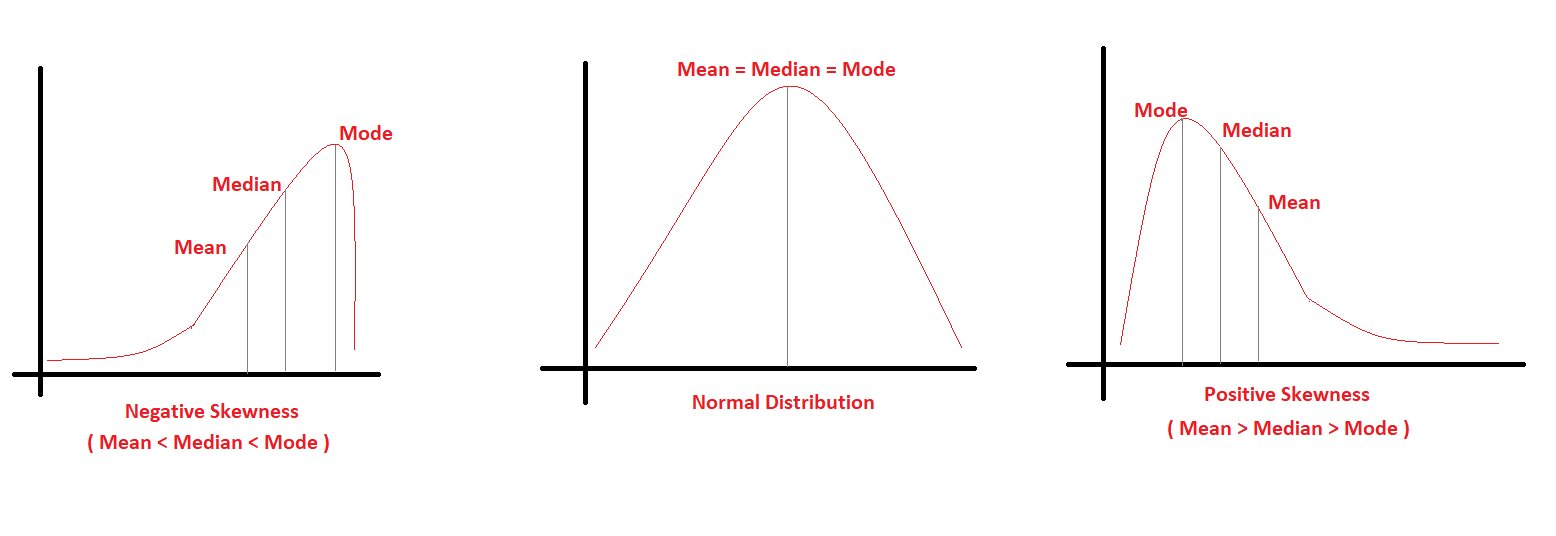

In [15]:
df.skew()

age                        0.599896
height_cm                 -0.186882
weight_kg                  0.349805
body fat_%                 0.361132
diastolic                 -0.159637
systolic                  -0.048654
gripForce                  0.018456
sit and bend forward_cm    0.785492
sit-ups counts            -0.467830
broad jump_cm             -0.422623
dtype: float64

- Skewness = 0.0: The dataset has perfect symmetry.
- Skewness > 0: The dataset is right-skewed, meaning it has a longer tail on the right side.
- Skewness < 0: The dataset is left-skewed, indicating a longer tail on the left side.

**Handling skewness in the data can involve various techniques, including:**

1. **Logarithmic Transformation:** Applying a logarithmic function to the data can help reduce right-skewness.


2. **Square Root Transformation:** Square root transformation is useful for reducing right-skewness while preserving relative differences among smaller values.


3. **Box-Cox Transformation:** Box-Cox transformation is a parametric method that optimizes the transformation based on maximum likelihood estimation, making the data more normally distributed.


4. **Yeo-Johnson Transformation:** Similar to Box-Cox transformation, the Yeo-Johnson transformation is a generalized version that handles both positive and negative values.

##### Density Plots:

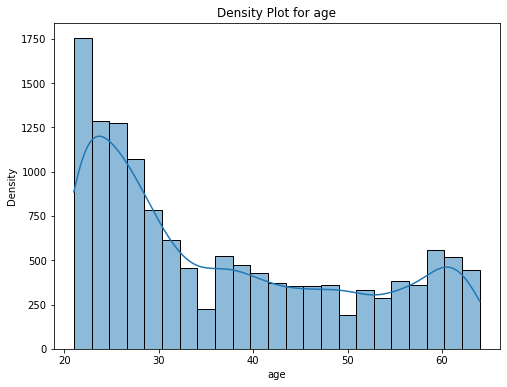

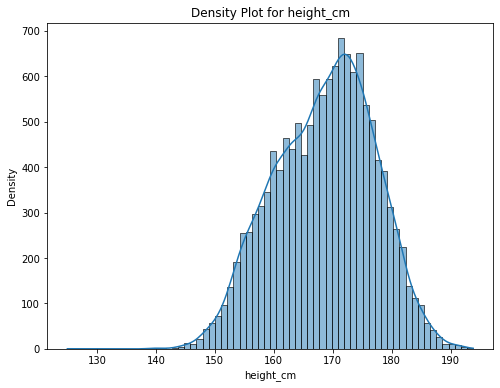

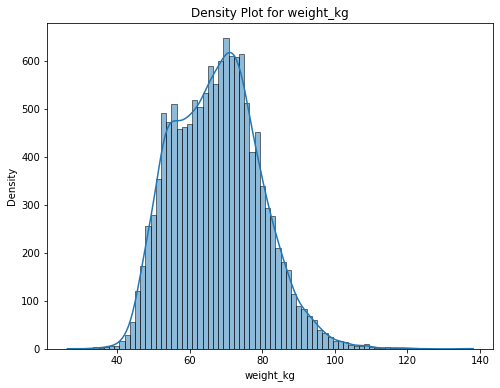

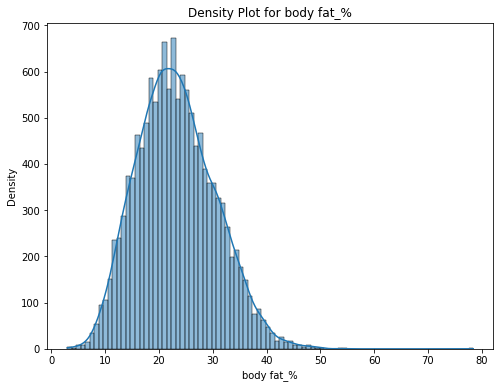

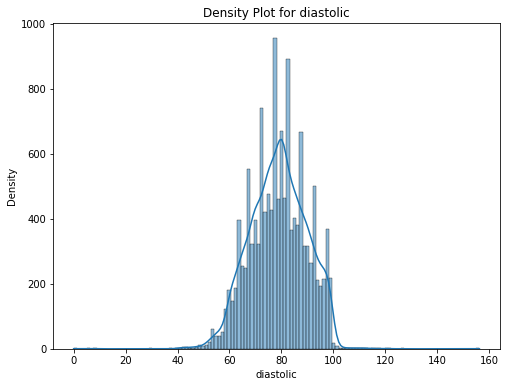

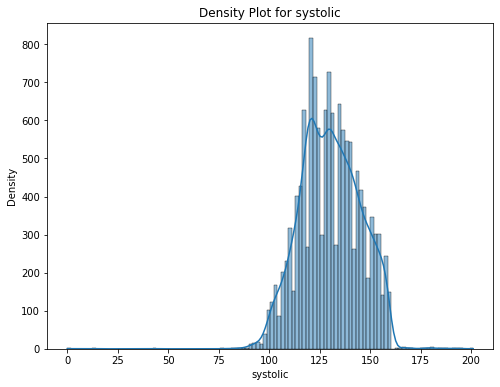

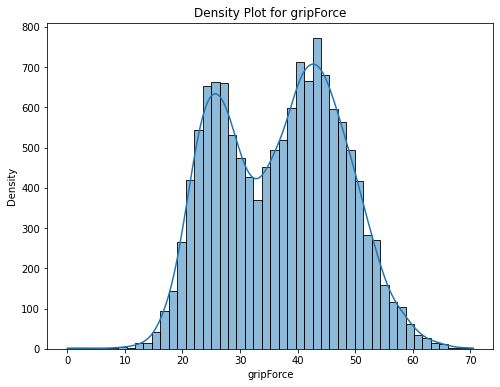

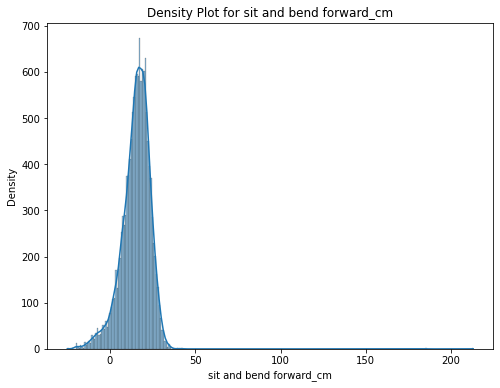

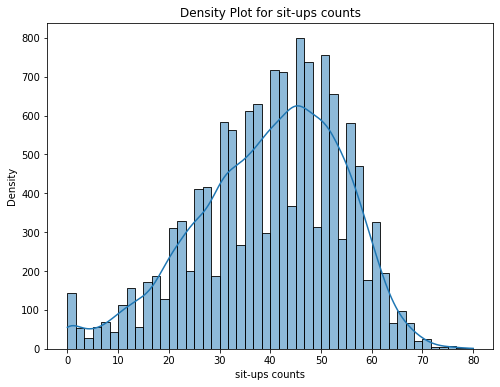

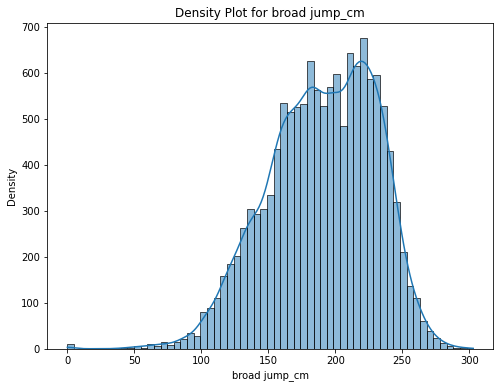

In [16]:
# Create density plots
for column in numeric_data:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Density Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

<AxesSubplot:ylabel='Density'>

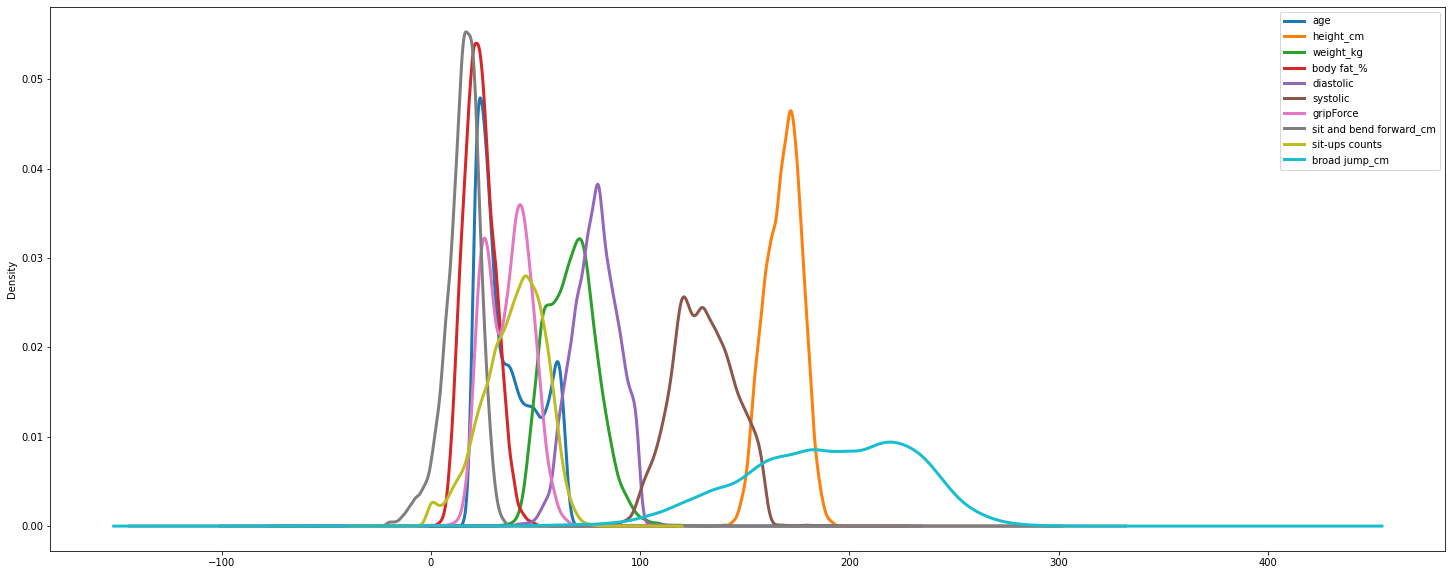

In [17]:
#Density of all features
df.plot.density(figsize = (25, 10),linewidth = 3)

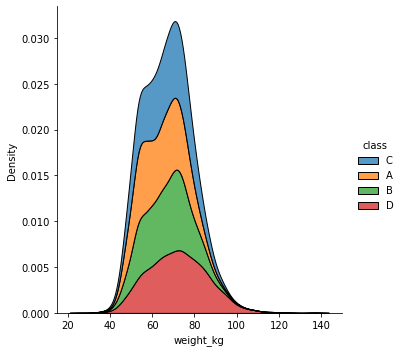

In [18]:
sns.displot(df, x="weight_kg", hue="class", kind="kde", multiple="stack")

##### iii) Kurtosis

- Kurtosis is the measure of describing the distribution of data.
- This data is distributed in different ways. They are:

1. Platykurtic
2. Mesokurtic
3. Leptokurtic

**1.Platykurtic:** 
- The platykurtic shows a distribution with flat tails. Here the data is distributed faltly . The flat tails indicated the small outliers in the distribution.

- A distribution with negative kurtosis (platykurtic) has a flatter peak and lighter tails compared to a normal distribution.

**2.Mesokurtic:** 
- In Mesokurtic, the data is widely distributed. It is normally distributed and it also matches normal distribution.

**3.Leptokurtic:** 
- In leptokurtic, the data is very closely distributed. The height of the peak is greater than width of the peak.

- A distribution with positive kurtosis (leptokurtic) has a sharper peak and heavier tails compared to a normal distribution.

**Note:** Kurtosis values greater than 3 indicate leptokurtic distributions, while values less than 3 indicate platykurtic distributions.

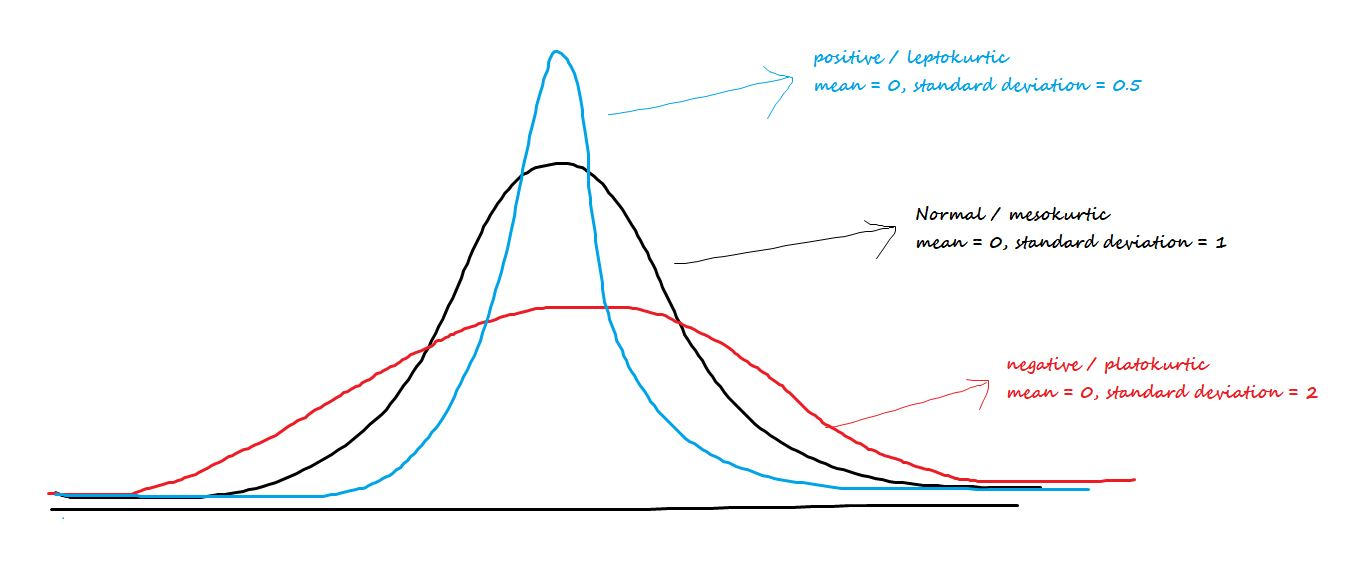

In [19]:
df.kurt()

age                        -1.017671
height_cm                  -0.433053
weight_kg                   0.171606
body fat_%                  0.128712
diastolic                   0.363525
systolic                    0.380285
gripForce                  -0.822200
sit and bend forward_cm    35.220856
sit-ups counts             -0.156326
broad jump_cm               0.002397
dtype: float64

- A kurtosis value of approximately -1.224 suggests that your dataset has negative kurtosis, meaning it is platykurtic. Here's what the kurtosis value indicates:

**Kurtosis = 0:** The dataset has the same kurtosis as a normal distribution.

**Kurtosis > 0:** The dataset is leptokurtic, meaning it has heavier tails and a sharper peak compared to a normal distribution.

**Kurtosis < 0:** The dataset is platykurtic, indicating it has lighter tails and a flatter peak compared to a normal distribution.

##### 1.2.4 Inter Quartile Range(IQR)

The interquartile range (IQR) is a measure of statistical dispersion, which describes the range between the first quartile (Q1) and the third quartile (Q3) in a dataset. It is a robust measure of variability that is less affected by outliers compared to the range.

**Here's how you can calculate the interquartile range:**

1. **Sort the dataset:** Arrange the data in ascending order.
2. **Find the first quartile (Q1):** This is the value below which 25% of the data falls.
3. **Find the third quartile (Q3):** This is the value below which 75% of the data falls.
4. **Calculate the interquartile range (IQR):** IQR = Q3 - Q1.

- The IQR gives an indication of the spread of the middle 50% of the dataset. It provides a measure of the variability of the dataset that is resistant to outliers.

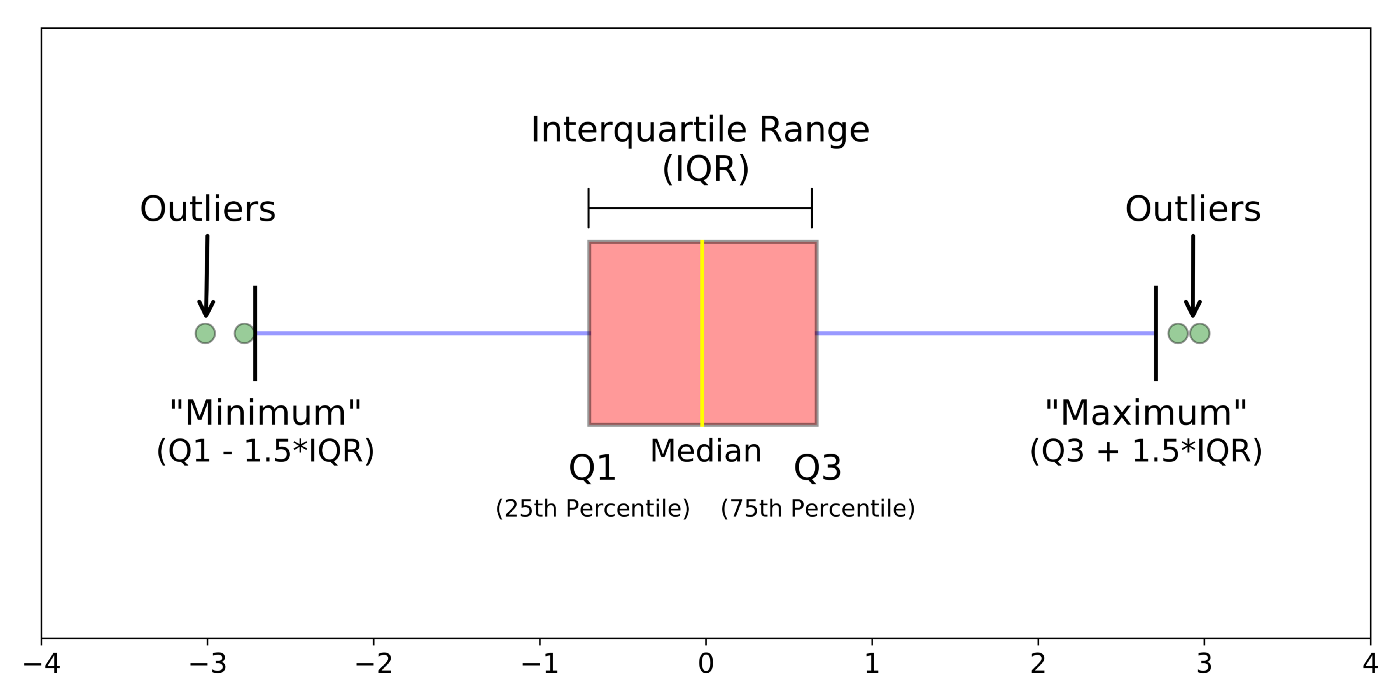

In [20]:
numeric_data = df.select_dtypes(exclude='object')

for col in numeric_data.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))  

IQR of age : 23
IQR of height_cm : 12
IQR of weight_kg : 17
IQR of body fat_% : 10
IQR of diastolic : 15
IQR of systolic : 21
IQR of gripForce : 17
IQR of sit and bend forward_cm : 9
IQR of sit-ups counts : 20
IQR of broad jump_cm : 59


- **Age:** The IQR of 23 suggests that the age distribution spans a wide range, with the central 50% of the data falling within this interval.


- **Height (cm):** With an IQR of 12, the variability in height is moderate, indicating that most individuals fall within a relatively narrow height range.


- **Weight (kg):** The IQR of 17 indicates significant variability in weight within the dataset, with the central 50% of individuals having weights distributed across this range.


- **Body Fat Percentage:** The IQR of 10 suggests moderate variability in body fat percentage among individuals, with the central 50% falling within this interval.


- **Diastolic Blood Pressure:** With an IQR of 15, the diastolic blood pressure exhibits notable variability among individuals, indicating differences in cardiovascular health within the dataset.


- **Systolic Blood Pressure:** The IQR of 21 indicates considerable variability in systolic blood pressure, which is crucial for assessing overall cardiovascular health and risk factors.


- **Grip Force:** With an IQR of 17, grip force demonstrates moderate variability, reflecting differences in hand strength among individuals.


- **Sit and Bend Forward (cm):** The IQR of 9 suggests relatively low variability in the sit and bend forward measurement, indicating consistency in flexibility among individuals.


- **Sit-ups Counts:** The IQR of 20 indicates substantial variability in the number of sit-ups performed, reflecting differences in fitness levels and abdominal strength within the dataset.


- **Broad Jump (cm):** With an IQR of 59, the broad jump measurement exhibits significant variability, suggesting differences in lower body strength and power among individuals.

##### 1.2.5 Range 

- The range of data is the difference between the maximum and minimum element in the dataset.

In [21]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   height_cm                13393 non-null  float64
 2   weight_kg                13393 non-null  float64
 3   body fat_%               13393 non-null  float64
 4   diastolic                13393 non-null  float64
 5   systolic                 13393 non-null  float64
 6   gripForce                13393 non-null  float64
 7   sit and bend forward_cm  13393 non-null  float64
 8   sit-ups counts           13393 non-null  float64
 9   broad jump_cm            13393 non-null  float64
dtypes: float64(10)
memory usage: 1.0 MB


In [22]:
for col in numeric_data.columns:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of age : 43
range of height_cm : 68
range of weight_kg : 111
range of body fat_% : 75
range of diastolic : 156
range of systolic : 201
range of gripForce : 70
range of sit and bend forward_cm : 238
range of sit-ups counts : 80
range of broad jump_cm : 303


##### Mean Absolute Deviation (MAD):

- The mean absolute deviation is the average of the absolute differences between each data point and the mean.
- It measures the average distance of data points from the mean.
- MAD is less sensitive to outliers compared to variance and standard deviation.

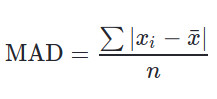

In [23]:
df.mad()

age                        11.844362
height_cm                   6.919084
weight_kg                   9.680199
body fat_%                  5.833442
diastolic                   8.651310
systolic                   12.026424
gripForce                   9.068306
sit and bend forward_cm     6.268510
sit-ups counts             11.571289
broad jump_cm              32.726099
dtype: float64

# 2. Inferential Statistics

Inferential statistics is a branch of statistics that involves using sample data to make inferences or predictions about a population. It allows researchers to draw conclusions and make generalizations based on limited information collected from a subset of the population.

**Here are some key concepts and techniques used in inferential statistics:**

##### 2.1 Population and Sample:

- In statistics, the population refers to the entire group of individuals or objects that we are interested in studying.

- A sample is a subset of the population that is selected for study. It is often impractical or impossible to study the entire population, so researchers use samples to make inferences about the population.
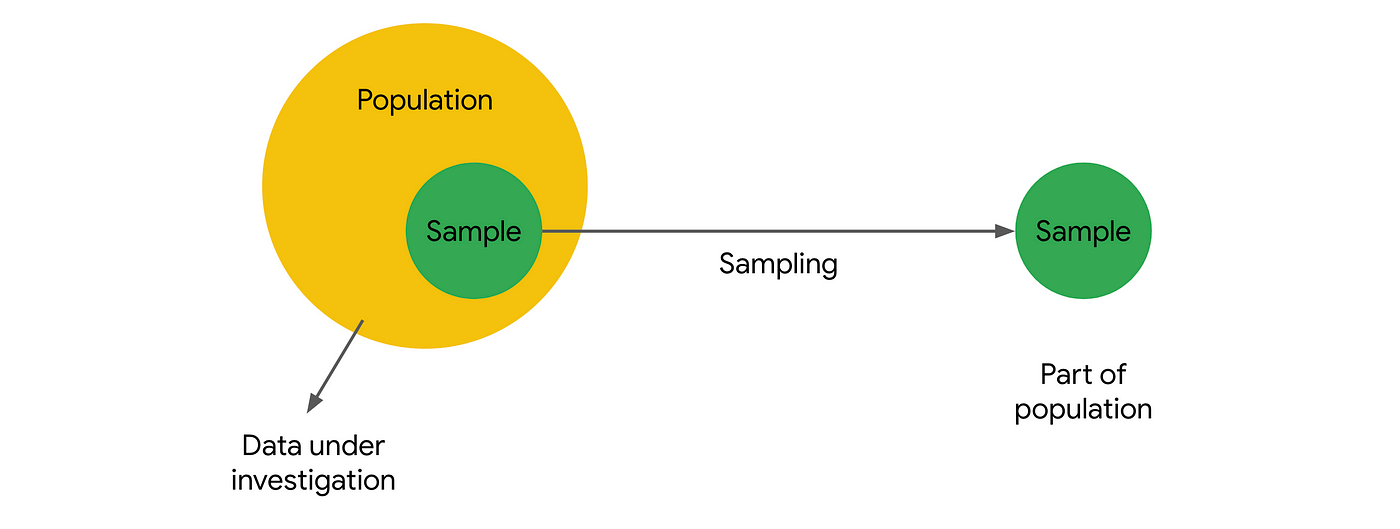



##### 2.2 Sampling Methods:

Data sampling is a statistical analysis technique used to select, manipulate and analyze a representative subset of data points to identify patterns and trends in the larger data set being examined.

Various sampling methods, such as simple random sampling, stratified sampling, cluster sampling, and systematic sampling, are used to select representative samples from the population.

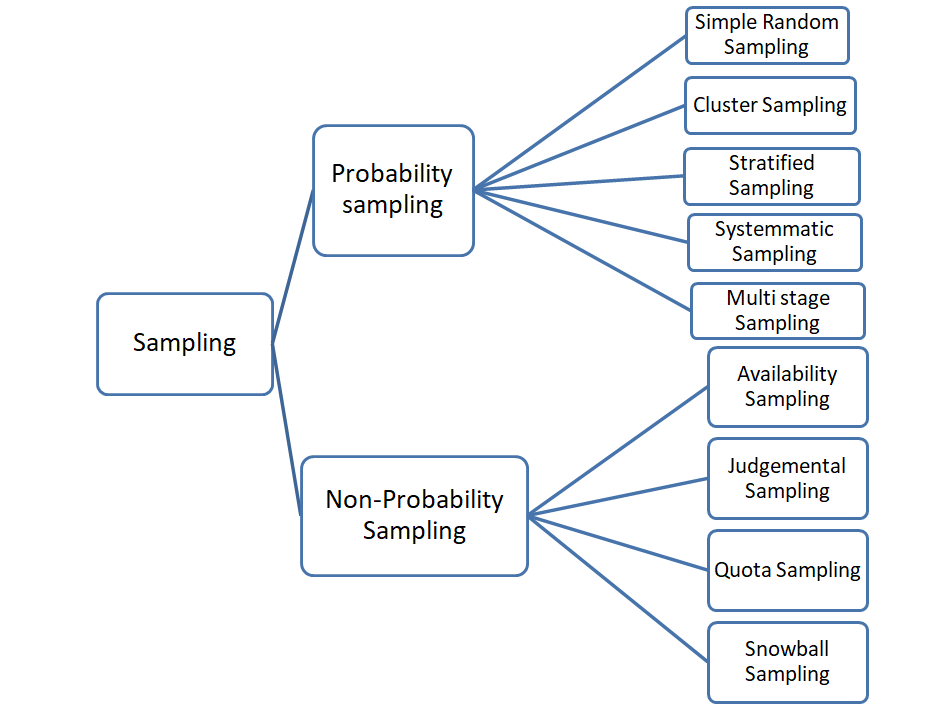

**Probability Sampling:** In probability sampling, every element of the population has an equal chance of being selected. Probability sampling gives us the best chance to create a sample that is truly representative of the population.


**Non-Probability Sampling:** In non-probability sampling, all elements do not have an equal chance of being selected. Consequently, there is a significant risk of ending up with a non-representative sample which does not produce generalizable results

In [24]:
#random sampling in python
df.sample(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
8048,28.0,M,169.0,65.1,19.6,96.0,151.0,47.4,20.8,54.0,252.0,A
3041,27.0,F,160.7,54.6,26.2,89.0,145.0,23.1,29.5,48.0,187.0,A
5596,22.0,F,163.8,75.1,32.9,74.0,126.0,35.2,16.0,27.0,173.0,D
708,41.0,F,165.2,67.5,30.4,72.0,123.0,27.4,19.9,35.0,177.0,C
13188,64.0,M,169.1,63.7,17.8,98.0,153.0,35.8,11.5,32.0,166.0,B


##### 2.3 Central Limit Theorem

The Central Limit Theorem (CLT) is a fundamental concept in statistics that states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the shape of the population distribution.

**Key points about the Central Limit Theorem:**

1. **Distribution of Sample Means:** The Central Limit Theorem applies to the distribution of sample means, not to individual observations. It states that if you repeatedly draw samples of size n from any population, calculate the mean of each sample, and then plot the distribution of those sample means, the distribution will approach a normal distribution as n increases.


2. **Independence and Identical Distribution (IID):** The samples must be drawn independently and have the same probability distribution. Each sample should be representative of the population and should not be influenced by the other samples.


3. **Sample Size Matters:** The larger the sample size (n), the closer the sampling distribution of the sample mean will be to a normal distribution, regardless of the shape of the population distribution.


4. **Mean and Standard Deviation:** The mean of the sampling distribution of the sample means will be equal to the population mean, and the standard deviation (often referred to as the standard error) will be equal to the population standard deviation divided by the square root of the sample size (σ/ root(n)).


5. **Assumptions and Limitations:** While the Central Limit Theorem is a powerful tool, it has some assumptions and limitations. It assumes that the samples are drawn randomly and that the population variance is finite. In practice, very large sample sizes may be required for the theorem to hold in cases where the population distribution is heavily skewed or has long tails.


6. **Applications:** The Central Limit Theorem is widely used in inferential statistics. It allows statisticians to make probabilistic statements about population parameters based on sample statistics. For example, it forms the basis for many hypothesis tests, confidence intervals, and regression analysis techniques.

**How is the Central Limit Theorem used?**

It enables us to test the hypothesis of whether our sample represents a population distinct from the known population. We can take a mean from a sample and compare it with the sampling distribution to estimate the probability whether the sample comes from the known population.

##### 2.6 Confidence Intervals:

Confidence intervals provide a range of values within which the true population parameter is likely to lie, based on sample data and a specified level of confidence (e.g., 95% confidence interval).

- Confidence Interval is a type of estimate computed from the statistics of the observed data which gives a range of values that’s likely to contain a population parameter with a particular level of confidence.


- A confidence interval for the mean is a range of values between which the population mean possibly lies.

<AxesSubplot:xlabel='weight_kg', ylabel='height_cm'>

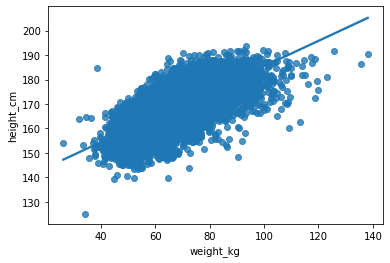

In [25]:
sns.regplot(data = df, x="weight_kg", y="height_cm", ci=95)

- The larger the confidence level, the wider the confidence interval. For example, here’s how to calculate a 95% C.I. 

**for the data:**

In [26]:
#Method to calculate C.I
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [27]:
mean_confidence_interval(df['age'], confidence=0.95)

(36.77510639886508, 36.54432260771787, 37.00589019001228)

In [28]:
#In-built function to calculate C.I
import statsmodels.api as sm
sm.stats.DescrStatsW(df['age']).zconfint_mean()

(36.54434346585151, 37.00586933187864)

##### 2.7 Hypothesis Testing:

- Hypothesis testing is a method used to evaluate the validity of claims or hypotheses about a population parameter.

- It involves formulating null and alternative hypotheses, collecting sample data, and using statistical tests to determine whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis.

**It is generally used when we were to compare:**

- A single group with an external standard
- Two or more groups with each other

**The two types of hypothesis testing are null hypothesis and alternate hypothesis.**

- 1. Null hypothesis is the initial assumption about an event (also referred to as the ground truth).
- 2. Alternate hypothesis is an assumption that counters the initial assumption.


**Common hypothesis tests include t-tests, chi-square tests, ANOVA, correlation tests, and regression analysis.**

##### Null Hypothesis (H0):

- The null hypothesis is a statement of no effect, no difference, or no relationship between variables.

- It represents the status quo or the default assumption that there is no real effect or difference in the population.

- It is typically denoted as H0.

- In hypothesis testing, the null hypothesis is assumed to be true unless there is sufficient evidence to reject it based on the sample data.

- For example, if we are testing whether a new drug is effective in treating a disease, the null hypothesis might state that the drug has no effect compared to a placebo.

##### Alternative Hypothesis (H1 or Ha):

- The alternative hypothesis is a statement that contradicts the null hypothesis and represents what the researcher hopes to demonstrate.

- It asserts the presence of an effect, difference, or relationship in the population.

- It is denoted as H1 or Ha.

- It can be one-tailed or two-tailed, depending on the directionality of the effect being investigated.

- In hypothesis testing, the goal is to gather evidence against the null hypothesis in favor of the alternative hypothesis.

- Using the example of the drug effectiveness, the alternative hypothesis might state that the new drug is more effective than a placebo in treating the disease.

**While doing that, there is a likelihood of the following events happening:**

- The ground truth (H0) is true, so H0 is accepted.

- The ground truth (H0) is not true, so H0 is rejected and H1 is accepted.

    - The above two cases are the desired possibilities. It’s either our null hypothesis was right and adopted or our null hypothesis was wrong and rejected.

**The remaining possibilities are outlined below:**

 1. Null hypothesis (H0) is true but we reject it.

 2. Null hypothesis (H0) is not true, but we did not reject it.

##### 2.6 Estimation:

Estimation involves using sample data to estimate population parameters (e.g., mean, proportion, variance).
Point estimation involves estimating a single value for a population parameter.
Interval estimation involves estimating a range of values for a population parameter, often accompanied by a confidence level.

##### 2.7  Z-score:

- Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset.

- In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

- If a z-score is equal to 0, it is on the mean. A positive z-score indicates the raw score is higher than the mean average.

In [29]:
import scipy.stats as stats
z_scores = stats.zscore(numeric_data)
z_scores

array([[-0.71743212,  0.44387298,  0.65215002, ...,  0.37731734,
         1.41696147,  0.67400862],
       [-0.8642197 , -0.42246548, -0.97473438, ...,  0.12898358,
         0.92663372,  0.97501314],
       [-0.42385695,  1.31021144,  0.88312744, ..., -0.37950936,
         0.64644644, -0.22900492],
       ...,
       [ 0.16329338,  1.02538783,  1.09234611, ...,  0.14080899,
         0.36625915,  0.97501314],
       [ 1.99813815, -2.66545136, -0.81572819, ..., -0.71062104,
        -2.7858478 , -2.88787813],
       [-0.20367558, -0.54114198, -0.11275345, ..., -0.9589548 ,
         0.78654008, -0.25408863]])

##### 2.8 P Value:

The p-value, or probability value, is a measure used in statistical hypothesis testing to determine the strength of evidence against the null hypothesis. It quantifies the probability of obtaining the observed results, or more extreme results, assuming that the null hypothesis is true.

**Here's how p-values work:**

1. **Hypothesis Testing:** In hypothesis testing, researchers formulate a null hypothesis (H0) and an alternative hypothesis (H1). The null hypothesis typically represents the absence of an effect or difference, while the alternative hypothesis represents the presence of an effect, difference, or relationship.


2. **Test Statistic:** Researchers calculate a test statistic from the sample data, which measures the strength of evidence against the null hypothesis. The choice of test statistic depends on the specific hypothesis test being conducted (e.g., t-test, chi-square test, ANOVA).


3. **Sampling Distribution Under the Null Hypothesis:** Assuming that the null hypothesis is true, the p-value represents the probability of obtaining the observed test statistic or a more extreme value if repeated samples were drawn from the same population.


4. **Interpretation of the p-value:**

- A small p-value (typically less than a predetermined significance level, often denoted as alpha, α) suggests that the observed results are unlikely to have occurred by chance under the null hypothesis. In other words, it provides evidence against the null hypothesis.

- A large p-value indicates that the observed results are likely to have occurred by random chance, and there is insufficient evidence to reject the null hypothesis.


5. **Significance Level (Alpha):** The significance level, denoted as alpha (α), is the threshold below which the p-value is considered statistically significant. Commonly used significance levels include 0.05 (5%) and 0.01 (1%). If the p-value is less than the chosen significance level, the null hypothesis is rejected.


6. **Decision Rule:** Based on the p-value and the chosen significance level, researchers decide whether to reject the null hypothesis. If the p-value is less than or equal to the significance level, the null hypothesis is rejected. Otherwise, the null hypothesis is not rejected.

**Note:** The smaller our p-value is, the more delicate it is to trust our null hypothesis.

###### Method 1: Left tailed or Lower tailed test:

- In distribution, the lower tail includes the lowest values. Because the lowest values on a number line are on the left, the lowest group of numbers will always show on the left when graphing any distribution on a Coordinate plane. z- value is generally negative for the left tailed test.

###### Method 2: Right tailed or upper tailed test

- A right-tailed test or upper test is the inequality that is pointing to the right.

###### Method 3: Two-tailed tests

- In statistics, a two-tailed test is a procedure that uses a two-sided critical area of a distribution to determine if a sample is larger than or less than a given range of values.

In [30]:
p_values_1 = scipy.stats.norm.sf(abs(-0.717))#left-tailed

p_values_2 = scipy.stats.norm.sf(abs(z_scores)) #right-tailed

p_values_3 = scipy.stats.norm.sf(abs(z_scores))*2 #two-tailed

p_values_1, p_values_2, p_values_3

(0.23668704832971305,
 array([[0.23655375, 0.32856721, 0.2571522 , ..., 0.35296889, 0.0782471 ,
         0.25015292],
        [0.19373361, 0.33634264, 0.16484602, ..., 0.44868532, 0.17705837,
         0.16477687],
        [0.33583507, 0.09506216, 0.18858371, ..., 0.35215483, 0.25899514,
         0.40943255],
        ...,
        [0.43514372, 0.15259011, 0.1373405 , ..., 0.44401042, 0.35708585,
         0.16477687],
        [0.02285084, 0.00384425, 0.20732781, ..., 0.23865955, 0.0026694 ,
         0.00193925],
        [0.41930351, 0.29420486, 0.45511301, ..., 0.16879076, 0.21577557,
         0.39971354]]),
 array([[0.47310751, 0.65713442, 0.5143044 , ..., 0.70593779, 0.15649419,
         0.50030583],
        [0.38746721, 0.67268529, 0.32969203, ..., 0.89737064, 0.35411674,
         0.32955374],
        [0.67167014, 0.19012432, 0.37716742, ..., 0.70430965, 0.51799027,
         0.81886509],
        ...,
        [0.87028745, 0.30518023, 0.274681  , ..., 0.88802084, 0.71417171,
         0.3

In [31]:
#Example to understand easily:
scipy.stats.norm.sf(abs(0.65))

0.2578461108058647

- The p-value is 0.2587. If we use a significance level of α = 0.05, we would fail to reject the null hypothesis of our hypothesis test because this p-value is not less than 0.05.

##### 2.9 T - Tests:

T-tests are statistical tests used to determine if there is a significant difference between the means of two groups. They are commonly used when comparing means of continuous variables between two groups to determine if there is evidence of a statistically significant difference.

**There are different types of T-tests:**

###### 1. Independent Samples T-test:

- Used when comparing the means of two independent groups.
- Assumptions include that the data is approximately normally distributed, the variances of the two groups are approximately equal, and the observations are independent.
- **Example:** Comparing the mean test scores of students who received tutoring versus those who did not.

###### 2. Paired Samples T-test (or Dependent Samples T-test):

- Used when comparing the means of two related groups or when participants are measured under two different conditions.
- Assumptions include that the differences between the paired observations are approximately normally distributed.
- **Example:** Comparing the mean scores of students before and after receiving tutoring.

###### 3. One-Sample T-test:

- Used when comparing the mean of a single sample to a known value (population mean).
- Assumptions include that the data is approximately normally distributed and the observations are independent.
- **Example:** Testing if the mean weight of a sample of patients differs from the population mean weight.


###### Steps to perform a T-test:

**1. Formulate Hypotheses:** Define the null hypothesis (H0) and the alternative hypothesis (H1).


**2. Choose the Level of Significance (Alpha):** Typically, α is set at 0.05, but it can vary based on the study.


**3. Collect Data:** Obtain data for the two groups or conditions being compared.


**4. Perform the T-test:** Calculate the T-statistic using appropriate formulas based on the type of T-test being conducted.


**5. Calculate the P-value:** Determine the probability of obtaining the observed results under the null hypothesis.


**6. Make a Decision:** Compare the calculated p-value to the chosen significance level (α) and decide whether to reject the null hypothesis.


**7. Interpret Results:** If the p-value is less than α, reject the null hypothesis and conclude that there is a statistically significant difference between the means of the two groups.

In [35]:
!pip install researchpy

In [32]:
# Independent T-test using researchpy
import researchpy as rp
rp.ttest(group1= df['body fat_%'][df['gender'] == 'M'], group1_name= "Male",
         group2= df['body fat_%'][df['gender'] == 'F'], group2_name= "Female")

(   Variable        N       Mean        SD        SE  95% Conf.   Interval
 0      Male   8467.0  20.188151  5.952703  0.064692  20.061339  20.314963
 1    Female   4926.0  28.486085  6.224667  0.088689  28.312216  28.659955
 2  combined  13393.0  23.240165  7.256844  0.062706  23.117252  23.363077,
               Independent t-test     results
 0  Difference (Male - Female) =      -8.2979
 1          Degrees of freedom =   13391.0000
 2                           t =     -76.4874
 3       Two side test p value =       0.0000
 4      Difference < 0 p value =       0.0000
 5      Difference > 0 p value =       1.0000
 6                   Cohen's d =      -1.3706
 7                   Hedge's g =      -1.3705
 8               Glass's delta =      -1.3940
 9                 Pearson's r =       0.5514)

In [33]:
#Independent T-test using Scipy.stats

stats.ttest_ind(df['body fat_%'][df['gender'] == 'M'],
                df['body fat_%'][df['gender'] == 'F'])

Ttest_indResult(statistic=-76.48742318447472, pvalue=0.0)

##### 2.10 ANOVA (Analysis of Variance):

ANOVA is a statistical technique used to compare means across multiple groups or treatments to determine whether there are significant differences between them.

- ANOVA is a word coined from ‘Analysis of Variance’. It is a statistical concept that shows the differences between the means of more than two independent groups, using variance analysis on samples from those groups.


- It is used for checking the contrast between three or more samples with one test. Especially when the categorical class has over two categories.


- During ANOVA testing, the hypothesis is:
    - 1. H0: When all samples’ means are the same.
    - 2. H1: When one or more samples are very much different.

**There are several types of ANOVA**

**1. One-Way ANOVA:**

- Used when comparing the means of three or more independent groups on a single continuous dependent variable.
- Assesses whether there are statistically significant differences among the means of the groups.
- **Example:** Comparing the effectiveness of three different teaching methods on student performance.

In [34]:
#  we will check if weight_kg, has an effect on body fat_% and sit-ups counts using one-way ANOVA test
from scipy.stats import f_oneway
class1 = df['weight_kg']
class2 = df['body fat_%']
class3 = df['sit-ups counts'] 
print(f_oneway(class1, class2, class3))

F_onewayResult(statistic=50205.485172216446, pvalue=0.0)


Since our p-value is 0, we dismiss the null hypothesis, as there exists no evidence sustainable enough to accept it.

This means that the sample means are very different. Meaning that our H1 (alternate hypothesis) is true.

**2. Two-Way ANOVA:**

- Also known as Factorial ANOVA, it extends the one-way ANOVA by allowing for the analysis of two independent categorical variables (factors) and their interaction on a single continuous dependent variable.

- Assesses the main effects of each factor and their interaction effect on the dependent variable.

- **Example:** Investigating the effects of both gender and treatment type on exam scores.

In [35]:
from statsmodels.formula.api import ols
weight = df['weight_kg']
height = df['height_cm']
fat = df['body fat_%']
classes = df['class']

model = ols('weight ~ C(fat) ', data=numeric_data).fit()

print(sm.stats.anova_lm(model, typ=2))

                sum_sq       df        F        PR(>F)
C(fat)    1.320194e+05    526.0  1.81387  1.015159e-25
Residual  1.780285e+06  12866.0      NaN           NaN


**3. Repeated Measures ANOVA:**

- Used when measurements are taken on the same subjects or items under different conditions or at different time points.

- Compares the means of the same group across multiple time points or conditions.

- Assesses whether there are statistically significant differences in the means across the different conditions or time points.

- **Example:** Assessing the effectiveness of a drug treatment by measuring patients' blood pressure before treatment, during treatment, and after treatment.

**4. MANOVA (Multivariate Analysis of Variance):**

- Extends ANOVA to situations where there are multiple dependent variables (multivariate data).

- Allows for the simultaneous analysis of multiple dependent variables to determine whether there are significant differences among the groups.

- **Example:** Assessing differences in academic performance, motivation, and satisfaction among students in different educational programs.

##### 2.11 Chi-squared Test:

The chi-squared test is a statistical test used to determine whether there is a significant association between categorical variables. It is commonly used to analyze contingency tables, which display the frequency distribution of two or more categorical variables.

**There are two main types of chi-squared tests:**

**1. Chi-squared Test for Independence:**

- This test is used to determine whether there is a significant association between two categorical variables.


- The null hypothesis (H0) assumes that the variables are independent, meaning there is no association between them.


- The alternative hypothesis (H1) suggests that there is a significant association between the variables.


- The test statistic for the chi-squared test for independence is calculated based on the differences between the observed and expected frequencies in each cell of the contingency table.


- The degrees of freedom for the test are determined by the number of rows and columns in the contingency table.


- The chi-squared test statistic follows a chi-squared distribution under the null hypothesis.

**2. Chi-squared Test for Goodness of Fit:**

- This test is used to determine whether an observed frequency distribution fits a theoretical (expected) distribution.


- It is commonly used to compare observed frequencies to expected frequencies in a single categorical variable.


- The null hypothesis (H0) assumes that there is no significant difference between the observed and expected frequencies.


- The alternative hypothesis (H1) suggests that there is a significant difference between the observed and expected frequencies.


- The test statistic for the chi-squared test for goodness of fit is calculated based on the differences between the observed and expected frequencies.


- The degrees of freedom for the test are determined by the number of categories in the categorical variable minus one.


- The chi-squared test statistic follows a chi-squared distribution under the null hypothesis.

**Note:** A low value for chi-square means there is a high correlation between your two sets of data.

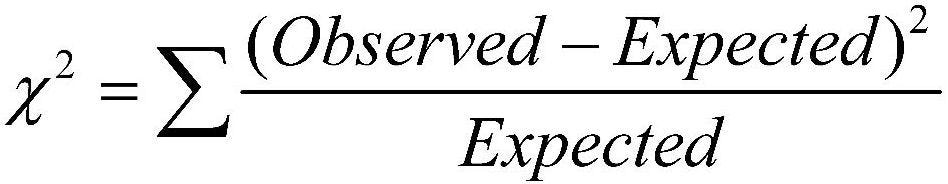

In [36]:
# create contingency table
data_crosstab = pd.crosstab(df['gender'],
                            df['class'],
                           margins=True, margins_name="Total")
data_crosstab

class,A,B,C,D,Total
gender,,,,,
F,1484,1185,1112,1145,4926
M,1864,2162,2237,2204,8467
Total,3348,3347,3349,3349,13393


In [37]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['gender'].unique()
columns = df['class'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [38]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 112.77302615919672  and p value is: 0.0
Null Hypothesis is rejected.


In [39]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 112.77302615919672  and critical value is: 7.814727903251179
Null Hypothesis is rejected.


# 3. Data Distribution

##### 3.1 Boxplot

<AxesSubplot:>

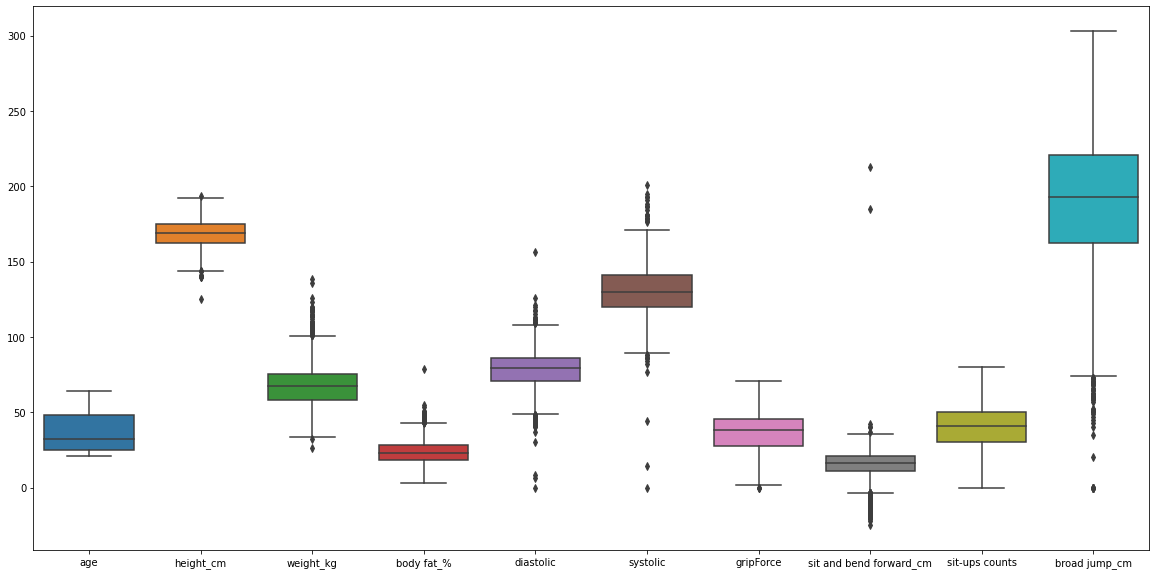

In [40]:
#Boxlot can plot outliers in data
plt.figure(figsize = (20, 10))
sns.boxplot(data = df)

##### 3.1.2 Outliers And Its Removal

**Removing Outliers using IQR:**

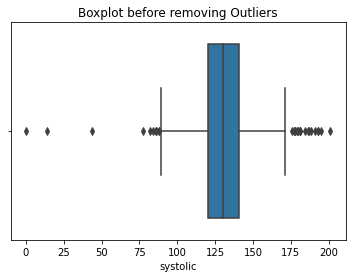

In [41]:
#Take an example by removing outliers in 'systolic' column:
sns.boxplot(df['systolic'])
plt.title('Boxplot before removing Outliers')
plt.show()

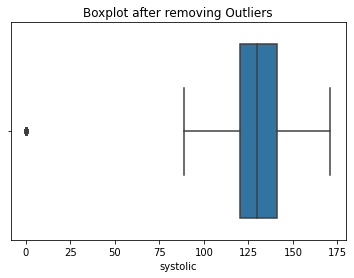

In [42]:
def remove_outliers(df, column_name):
    for i in df[column_name]:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_tail = q1 - 1.5 * iqr
        upper_tail = q3 + 1.5 * iqr

        if i > upper_tail or i < lower_tail:
            df[column_name] = df[column_name].replace(i, 0)

    sns.boxplot(df[column_name])
    plt.title('Boxplot after removing Outliers')
    plt.show()

# Assuming df is already defined
remove_outliers(df, 'systolic')

##### 3.2 Histograms:

<AxesSubplot:xlabel='weight_kg', ylabel='Density'>

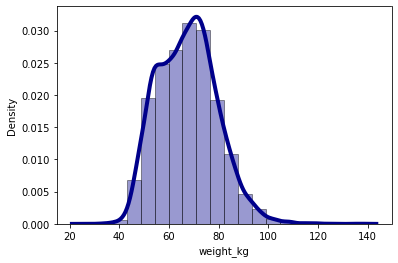

In [43]:
sns.distplot(df['weight_kg'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

##### 3.3 Normal Q-Q Plot

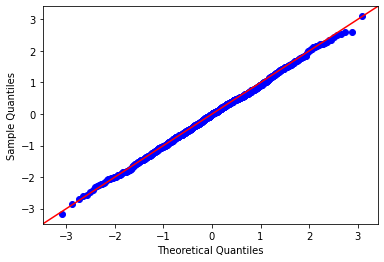

<Figure size 216x288 with 0 Axes>

In [44]:
import statsmodels.api as sm

#create Q-Q plot with 45-degree line added to plot for normal data
data = np.random.normal(0,1, 1000)
fig = sm.qqplot(data, line='45')
plt.figure(figsize=(3,4))
plt.show()

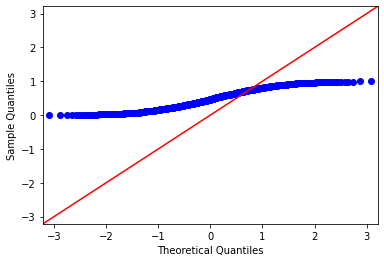

<Figure size 216x288 with 0 Axes>

In [45]:
#create Q-Q plot with 45-degree line added to plot for uniform distributed data
data = np.random.uniform(0,1, 1000)
fig = sm.qqplot(data, line='45')
plt.figure(figsize=(3,4))
plt.show()

###### 3.4 Scatterplot

<Figure size 1080x2016 with 0 Axes>

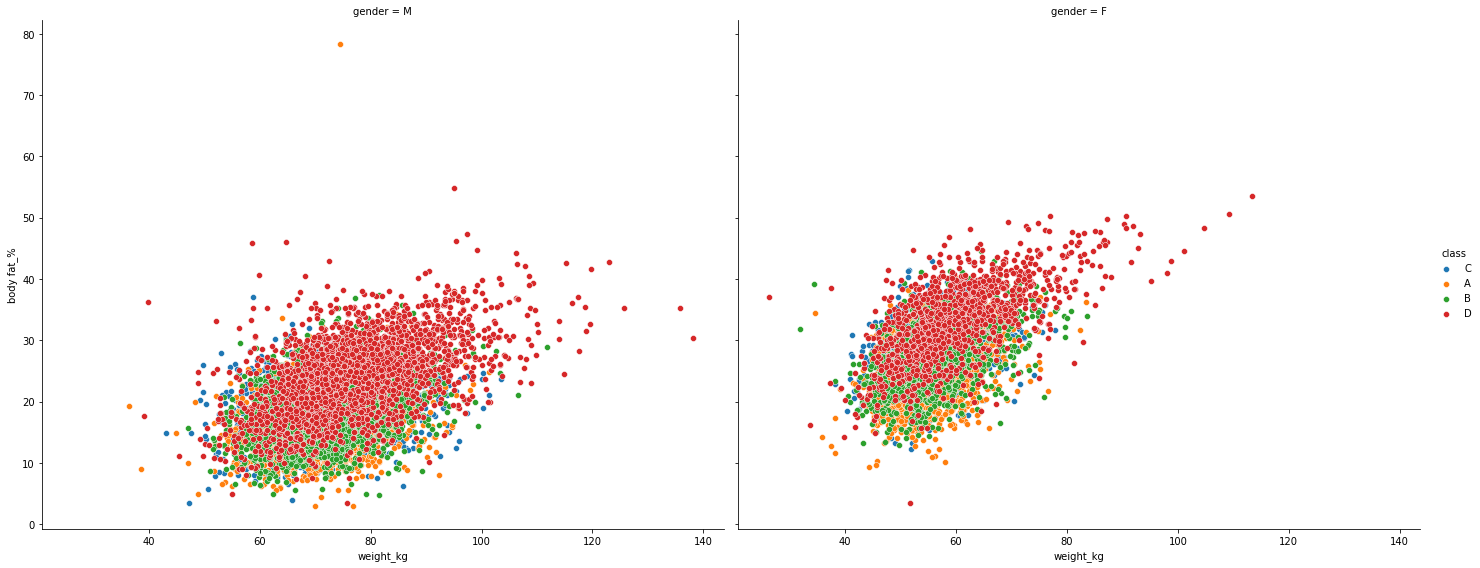

In [46]:
plt.figure(figsize = (15,28))
g = sns.FacetGrid(df, col="gender", hue="class",height=8, aspect=10/8)
g.map(sns.scatterplot, "weight_kg", "body fat_%")
g.add_legend()

###### 3.5 Barchart

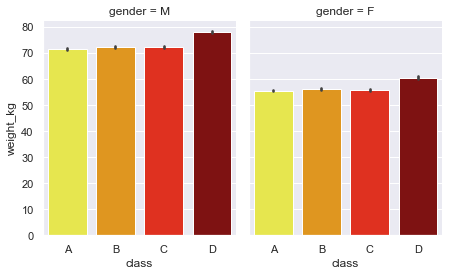

In [49]:
# Set figure size
sns.set(rc = {'figure.figsize':(8,6)})

# Create FacetGrid
g = sns.FacetGrid(df, col="gender", height=4, aspect=0.8 )

# Map barplot to each facet
g.map(sns.barplot, "class", "weight_kg",order=['A','B','C','D'],palette='hot_r' )

# Show the plot
plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

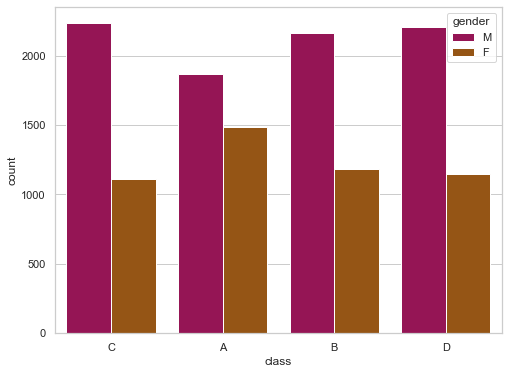

In [50]:
# Set figure size
sns.set(rc = {'figure.figsize':(8,6)})

# Create FacetGrid
sns.set_style('whitegrid')

# Map barplot to each facet
sns.countplot(x='class',hue='gender',data=df,palette='brg')

<AxesSubplot:xlabel='class', ylabel='body fat_%'>

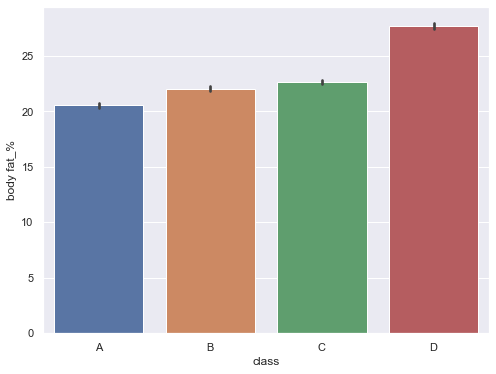

In [51]:
# Set figure size
sns.set(rc = {'figure.figsize':(8,6)})

# Map barplot to each facet
sns.barplot(data = df, x='class',y='body fat_%',order=['A','B','C','D'])

###### 3.6 Piechart

<Figure size 1080x432 with 0 Axes>

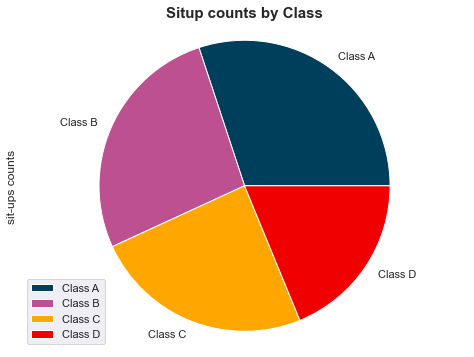

In [52]:
# Set figure size
# Set the size of the figure
plt.figure(figsize=(15, 6))

# Define labels for the pie chart
labels = ['Class A', 'Class B', 'Class C', 'Class D']

# Group data by 'class' and plot a pie chart
df.groupby(['class']).sum().plot(kind='pie', y='sit-ups counts', labels=labels, colors=['#003f5c', '#bc5090', '#ffa600', '#f00000'])

# Make the aspect ratio equal to make it a circle
plt.axis('equal')

# Set the title of the pie chart
plt.title('Situp counts by Class', fontsize=15, fontweight='bold')

# Display the pie chart
plt.show()

<Figure size 1080x432 with 0 Axes>

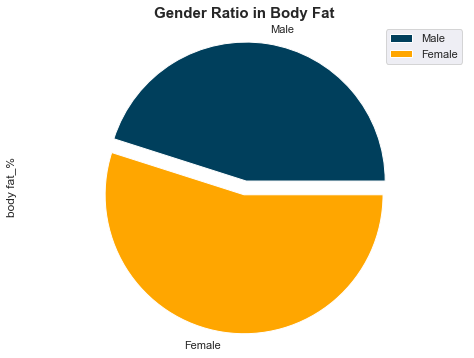

In [53]:
# Set the size of the figure
plt.figure(figsize=(15, 6))

# Define labels for the pie chart
labels = ['Male', 'Female']

# Group data by 'gender' and plot a pie chart
df.groupby(['gender']).sum().plot(kind='pie', y='body fat_%', labels=labels, colors=['#003f5c', '#ffa600'], explode=(0.0, 0.1))

# Make the aspect ratio equal to make it a circle
plt.axis('equal')

# Set the title of the pie chart
plt.title('Gender Ratio in Body Fat', fontsize=15, fontweight='bold')

# Display the pie chart
plt.show()

# Happy Learning!